### 필요한 라이브러리

In [2]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 데이터 수집

#### 공공데이터포털_전라남도_딸기 데이터 가져오기

In [3]:
apikey = 'PJxL%2BXY%2F3jCY4HSnB6mvwYVVe%2FRjjeO2Mh0HsQUsNo%2FrFTh3m87PBCzUhIEDInkArvhb5jRrWxzoq5JWW97Eow%3D%3D'

pageSize = 100
startPage = 1



api = "http://apis.data.go.kr/6460000/jnStGwtStdMain/getJnStGwtStdMainList?serviceKey={key}&pageSize={size}&startPage={page}"

url = api.format(key = apikey,
                 size = pageSize,
                 page = startPage)


response = requests.get(url)
print(response.content)

b'<?xml version="1.0" encoding="UTF-8" standalone="yes"?><response><header><resultCode>00</resultCode><resultMsg>success</resultMsg></header><body><pageIndex>0</pageIndex><pageSize>100</pageSize><startPage>0</startPage><totalCount>40</totalCount><data><list><accHarvestCnt>23.7</accHarvestCnt><accHarvestCntUnit>\xea\xb0\x9c</accHarvestCntUnit><createdAt>2021-07-19 06:30:18.583908</createdAt><dt>\xec\xa0\x95\xec\x8b\x9d+18\xec\xa3\xbc</dt><dtAlias>1/11~1/17</dtAlias><flwrCnt>0.0</flwrCnt><flwrCntErr>0.0</flwrCntErr><flwrCntErrUnit>\xea\xb0\x9c</flwrCntErrUnit><flwrCntUnit>\xea\xb0\x9c</flwrCntUnit><fruitCnt>2.0</fruitCnt><fruitCntErr>\xc2\xb11.0</fruitCntErr><fruitCntErrUnit>\xea\xb0\x9c</fruitCntErrUnit><fruitCntUnit>\xea\xb0\x9c</fruitCntUnit><harvestCnt>0.5</harvestCnt><harvestCntUnit>\xea\xb0\x9c</harvestCntUnit><leng>42.8</leng><lengErr>\xc2\xb14.6</lengErr><lengErrUnit>cm</lengErrUnit><lengUnit>cm</lengUnit><lfCnt>17.1</lfCnt><lfCntErr>\xc2\xb12.3</lfCntErr><lfCntErrUnit>\xea\xb0\x

In [4]:
re = response.text
soup = BeautifulSoup(re, 'html.parser')
soup

c:\Users\admin\anaconda3\lib\site-packages\bs4\builder\__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


<?xml version="1.0" encoding="UTF-8" standalone="yes"?><response><header><resultcode>00</resultcode><resultmsg>success</resultmsg></header><body><pageindex>0</pageindex><pagesize>100</pagesize><startpage>0</startpage><totalcount>40</totalcount><data><list><accharvestcnt>23.7</accharvestcnt><accharvestcntunit>개</accharvestcntunit><createdat>2021-07-19 06:30:18.583908</createdat><dt>정식+18주</dt><dtalias>1/11~1/17</dtalias><flwrcnt>0.0</flwrcnt><flwrcnterr>0.0</flwrcnterr><flwrcnterrunit>개</flwrcnterrunit><flwrcntunit>개</flwrcntunit><fruitcnt>2.0</fruitcnt><fruitcnterr>±1.0</fruitcnterr><fruitcnterrunit>개</fruitcnterrunit><fruitcntunit>개</fruitcntunit><harvestcnt>0.5</harvestcnt><harvestcntunit>개</harvestcntunit><leng>42.8</leng><lengerr>±4.6</lengerr><lengerrunit>cm</lengerrunit><lengunit>cm</lengunit><lfcnt>17.1</lfcnt><lfcnterr>±2.3</lfcnterr><lfcnterrunit>개</lfcnterrunit><lfcntunit>개</lfcntunit><lfleng>9.6</lfleng><lflengerr>±1.9</lflengerr><lflengerrunit>cm</lflengerrunit><lflengunit>

In [5]:
addr_list = soup.find_all('fruitcnt')
addr_list

[<fruitcnt>2.0</fruitcnt>,
 <fruitcnt>3.0</fruitcnt>,
 <fruitcnt>3.0</fruitcnt>,
 <fruitcnt>1.5</fruitcnt>,
 <fruitcnt>1.4</fruitcnt>,
 <fruitcnt>0.8</fruitcnt>,
 <fruitcnt>1.0</fruitcnt>,
 <fruitcnt>1.4</fruitcnt>,
 <fruitcnt>1.5</fruitcnt>,
 <fruitcnt>1.7</fruitcnt>,
 <fruitcnt>1.2</fruitcnt>,
 <fruitcnt>1.2</fruitcnt>,
 <fruitcnt>2.0</fruitcnt>,
 <fruitcnt>2.0</fruitcnt>,
 <fruitcnt>2.6</fruitcnt>,
 <fruitcnt>2.4</fruitcnt>,
 <fruitcnt>2.6</fruitcnt>,
 <fruitcnt>2.9</fruitcnt>,
 <fruitcnt>2.1</fruitcnt>,
 <fruitcnt>2.9</fruitcnt>,
 <fruitcnt>3.0</fruitcnt>,
 <fruitcnt>4.2</fruitcnt>,
 <fruitcnt>5.8</fruitcnt>,
 <fruitcnt>5.3</fruitcnt>,
 <fruitcnt>5.9</fruitcnt>,
 <fruitcnt>4.0</fruitcnt>,
 <fruitcnt>4.6</fruitcnt>,
 <fruitcnt>8.2</fruitcnt>,
 <fruitcnt>6.5</fruitcnt>,
 <fruitcnt>7.2</fruitcnt>,
 <fruitcnt>6.3</fruitcnt>,
 <fruitcnt>4.0</fruitcnt>,
 <fruitcnt>3.5</fruitcnt>,
 <fruitcnt>3.1</fruitcnt>,
 <fruitcnt>2.0</fruitcnt>,
 <fruitcnt>0</fruitcnt>,
 <fruitcnt>0</fruitcnt>,
 <fru

In [6]:
leng_list = soup.find_all('leng')
lfLeng_list = soup.find_all('lfleng')
lfWidth_list = soup.find_all('lfwidth')
stalkLeng_list = soup.find_all('stalkleng')
lfCnt_list = soup.find_all('lfcnt')
pulpDia_list = soup.find_all('pulpdia')
flwrCnt_list = soup.find_all('flwrcnt')
fruitCnt_list = soup.find_all('fruitcnt')
leng_txt_list = []
lfLeng_txt_list = []
lfWidth_txt_list = []
stalkLeng_txt_list = []
lfCnt_txt_list = []
pulpDia_txt_list = []
flwrCnt_txt_list = []
fruitCnt_txt_list = []

for i in range(0, len(leng_list), 1):
    leng_txt_list.append(leng_list[i].text)
    lfLeng_txt_list.append(lfLeng_list[i].text)
    lfWidth_txt_list.append(lfWidth_list[i].text)
    stalkLeng_txt_list.append(stalkLeng_list[i].text)
    lfCnt_txt_list.append(lfCnt_list[i].text)
    pulpDia_txt_list.append(pulpDia_list[i].text)
    flwrCnt_txt_list.append(flwrCnt_list[i].text)
    fruitCnt_txt_list.append(fruitCnt_list[i].text)

# print(yad_txt_list)
# print(sido_txt_list)
# print(addr_txt_list)
# print(telno_txt_list)

df_temp = pd.DataFrame({'초장' : leng_txt_list,
                        '엽장' : lfLeng_txt_list,
                        '엽폭' : lfWidth_txt_list,
                        '엽병장' : stalkLeng_txt_list,
                        '엽수' : lfCnt_txt_list,
                        '관부직경' : pulpDia_txt_list,
                        '소화수' : flwrCnt_txt_list,
                        '착과수' : fruitCnt_txt_list})
df_temp

,초장,엽장,엽폭,엽병장,엽수,관부직경,소화수,착과수
0,42.8,9.6,7.5,23.2,17.1,19.3,0.0,2.0
1,43.0,8.7,8.0,25.5,18.8,18.3,0.0,3.0
2,44.3,10.5,7.8,22.4,20.0,17.6,1.5,3.0
3,45.0,9.5,7.4,23.4,19.0,18.2,1.1,1.5
4,44.9,10.0,7.8,24.6,19.7,17.4,1.1,1.4
5,43.6,9.2,7.4,22.1,16.8,19.7,1.0,0.8
6,41.2,9.6,7.3,22.1,17.2,19.1,1.1,1.0
7,41.8,9.6,7.5,20.3,17.5,19.2,1.1,1.4
8,38.8,8.7,6.9,19.3,15.0,19.7,1.3,1.5
9,36.1,8.8,7.1,18.6,15.2,19.4,1.0,1.7


In [7]:
df_temp = df_temp.dropna()
df_temp

,초장,엽장,엽폭,엽병장,엽수,관부직경,소화수,착과수
0,42.8,9.6,7.5,23.2,17.1,19.3,0.0,2.0
1,43.0,8.7,8.0,25.5,18.8,18.3,0.0,3.0
2,44.3,10.5,7.8,22.4,20.0,17.6,1.5,3.0
3,45.0,9.5,7.4,23.4,19.0,18.2,1.1,1.5
4,44.9,10.0,7.8,24.6,19.7,17.4,1.1,1.4
5,43.6,9.2,7.4,22.1,16.8,19.7,1.0,0.8
6,41.2,9.6,7.3,22.1,17.2,19.1,1.1,1.0
7,41.8,9.6,7.5,20.3,17.5,19.2,1.1,1.4
8,38.8,8.7,6.9,19.3,15.0,19.7,1.3,1.5
9,36.1,8.8,7.1,18.6,15.2,19.4,1.0,1.7


#### 전라남도_스마트팜_딸기 데이터 가져오기

In [8]:
file_path = './전라남도_스마트팜_딸기/단동&대규모(3000평이상)/'
len(os.listdir(file_path))

df = pd.DataFrame()

for i in range(0, len(os.listdir(file_path)), 1):
    test = pd.read_csv(file_path+os.listdir(file_path)[i], encoding='euc-kr')
    df = pd.concat([df,test])
    
df1 = df[['시도', '시군구', '품목명', '품종', '재배면적', '시설유형', '재배형태', '수집일', '주차', '초장', '엽장', '엽폭', '엽병장', '엽수', '관부직경', '화방 꽃수(소화수)', '착과수', '최종화방차수']]
df1 = df1.dropna()
df1


,시도,시군구,품목명,품종,재배면적,시설유형,재배형태,수집일,주차,초장,엽장,엽폭,엽병장,엽수,관부직경,화방 꽃수(소화수),착과수,최종화방차수
24,전라남도,장성군,딸기,금실,"3,002",비닐,수경,2021-01-29 00:00:00,27주차,21.0,7.0,6.0,11.0,12.0,35.0,0.0,4.0,0.0
25,전라남도,장성군,딸기,금실,"3,002",비닐,수경,2021-01-29 01:00:00,27주차,21.0,7.0,6.0,11.0,12.0,35.0,0.0,4.0,0.0
26,전라남도,장성군,딸기,금실,"3,002",비닐,수경,2021-01-29 02:00:00,27주차,21.0,7.0,6.0,11.0,12.0,35.0,0.0,4.0,0.0
27,전라남도,장성군,딸기,금실,"3,002",비닐,수경,2021-01-29 03:00:00,27주차,21.0,7.0,6.0,11.0,12.0,35.0,0.0,4.0,0.0
28,전라남도,장성군,딸기,금실,"3,002",비닐,수경,2021-01-29 04:00:00,27주차,21.0,7.0,6.0,11.0,12.0,35.0,0.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3014,전라남도,담양군,딸기,금실,"4,500",비닐,수경,2021-02-18 19:00:00,24주차,32.0,6.0,6.0,11.0,10.0,23.0,1.0,5.0,3.0
3015,전라남도,담양군,딸기,금실,"4,500",비닐,수경,2021-02-18 20:00:00,24주차,32.0,6.0,6.0,11.0,10.0,23.0,1.0,5.0,3.0
3016,전라남도,담양군,딸기,금실,"4,500",비닐,수경,2021-02-18 21:00:00,24주차,32.0,6.0,6.0,11.0,10.0,23.0,1.0,5.0,3.0
3017,전라남도,담양군,딸기,금실,"4,500",비닐,수경,2021-02-18 22:00:00,24주차,32.0,6.0,6.0,11.0,10.0,23.0,1.0,5.0,3.0


In [9]:
file_path = './전라남도_스마트팜_딸기/단동&소규모(1000평이하)/'
len(os.listdir(file_path))

df = pd.DataFrame()

for i in range(0, len(os.listdir(file_path)), 1):
    test = pd.read_csv(file_path+os.listdir(file_path)[i], encoding='euc-kr')
    df = pd.concat([df,test])
    
df2 = df[['시도', '시군구', '품목명', '품종', '재배면적', '시설유형', '재배형태', '수집일', '주차', '초장', '엽장', '엽폭', '엽병장', '엽수', '관부직경', '화방 꽃수(소화수)', '착과수', '최종화방차수']]
df2 = df2.dropna()
df2

,시도,시군구,품목명,품종,재배면적,시설유형,재배형태,수집일,주차,초장,엽장,엽폭,엽병장,엽수,관부직경,화방 꽃수(소화수),착과수,최종화방차수
192,전라남도,나주시,딸기,설향,510,비닐,수경,2021-02-05 00:00:00,21주차,23.0,9.0,7.0,11.0,10.0,20.0,2.0,9.0,0.0
193,전라남도,나주시,딸기,설향,510,비닐,수경,2021-02-05 01:00:00,21주차,23.0,9.0,7.0,11.0,10.0,20.0,2.0,9.0,0.0
194,전라남도,나주시,딸기,설향,510,비닐,수경,2021-02-05 02:00:00,21주차,23.0,9.0,7.0,11.0,10.0,20.0,2.0,9.0,0.0
195,전라남도,나주시,딸기,설향,510,비닐,수경,2021-02-05 03:00:00,21주차,23.0,9.0,7.0,11.0,10.0,20.0,2.0,9.0,0.0
196,전라남도,나주시,딸기,설향,510,비닐,수경,2021-02-05 04:00:00,21주차,23.0,9.0,7.0,11.0,10.0,20.0,2.0,9.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1869,전라남도,강진군,딸기,설향,600,비닐,수경,2021-04-16 19:00:00,30주차,32.0,11.0,7.0,19.0,18.0,19.0,1.0,3.0,5.0
1870,전라남도,강진군,딸기,설향,600,비닐,수경,2021-04-16 20:00:00,30주차,32.0,11.0,7.0,19.0,18.0,19.0,1.0,3.0,5.0
1871,전라남도,강진군,딸기,설향,600,비닐,수경,2021-04-16 21:00:00,30주차,32.0,11.0,7.0,19.0,18.0,19.0,1.0,3.0,5.0
1872,전라남도,강진군,딸기,설향,600,비닐,수경,2021-04-16 22:00:00,30주차,32.0,11.0,7.0,19.0,18.0,19.0,1.0,3.0,5.0


In [10]:
file_path = './전라남도_스마트팜_딸기/단동&중규모(1000~3000평)/'
len(os.listdir(file_path))

df = pd.DataFrame()

for i in range(0, len(os.listdir(file_path)), 1):
    test = pd.read_csv(file_path+os.listdir(file_path)[i], encoding='euc-kr')
    df = pd.concat([df,test])
    
df3 = df[['시도', '시군구', '품목명', '품종', '재배면적', '시설유형', '재배형태', '수집일', '주차', '초장', '엽장', '엽폭', '엽병장', '엽수', '관부직경', '화방 꽃수(소화수)', '착과수', '최종화방차수']]
df3 = df3.dropna()
df3

,시도,시군구,품목명,품종,재배면적,시설유형,재배형태,수집일,주차,초장,엽장,엽폭,엽병장,엽수,관부직경,화방 꽃수(소화수),착과수,최종화방차수
2694,전라남도,보성군,딸기,설향,"1,980",비닐,수경,2021-02-04 00:00:00,22주차,32.0,10.0,8.0,21.0,13.0,18.0,1.0,9.0,2.0
2695,전라남도,보성군,딸기,설향,"1,980",비닐,수경,2021-02-04 01:00:00,22주차,32.0,10.0,8.0,21.0,13.0,18.0,1.0,9.0,2.0
2696,전라남도,보성군,딸기,설향,"1,980",비닐,수경,2021-02-04 02:00:00,22주차,32.0,10.0,8.0,21.0,13.0,18.0,1.0,9.0,2.0
2697,전라남도,보성군,딸기,설향,"1,980",비닐,수경,2021-02-04 03:00:00,22주차,32.0,10.0,8.0,21.0,13.0,18.0,1.0,9.0,2.0
2698,전라남도,보성군,딸기,설향,"1,980",비닐,수경,2021-02-04 04:00:00,22주차,32.0,10.0,8.0,21.0,13.0,18.0,1.0,9.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2809,전라남도,보성군,딸기,설향,"1,848",비닐,수경,2021-02-15 19:00:00,22주차,26.0,9.0,6.0,17.0,11.0,19.0,1.0,10.0,3.0
2810,전라남도,보성군,딸기,설향,"1,848",비닐,수경,2021-02-15 20:00:00,22주차,26.0,9.0,6.0,17.0,11.0,19.0,1.0,10.0,3.0
2811,전라남도,보성군,딸기,설향,"1,848",비닐,수경,2021-02-15 21:00:00,22주차,26.0,9.0,6.0,17.0,11.0,19.0,1.0,10.0,3.0
2812,전라남도,보성군,딸기,설향,"1,848",비닐,수경,2021-02-15 22:00:00,22주차,26.0,9.0,6.0,17.0,11.0,19.0,1.0,10.0,3.0


In [11]:
file_path = './전라남도_스마트팜_딸기/연동&대규모(3000평이상)/'
len(os.listdir(file_path))

df = pd.DataFrame()

for i in range(0, len(os.listdir(file_path)), 1):
    test = pd.read_csv(file_path+os.listdir(file_path)[i], encoding='euc-kr')
    df = pd.concat([df,test])
    
df4 = df[['시도', '시군구', '품목명', '품종', '재배면적', '시설유형', '재배형태', '수집일', '주차', '초장', '엽장', '엽폭', '엽병장', '엽수', '관부직경', '화방 꽃수(소화수)', '착과수', '최종화방차수']]
df4 = df4.dropna()
df4

,시도,시군구,품목명,품종,재배면적,시설유형,재배형태,수집일,주차,초장,엽장,엽폭,엽병장,엽수,관부직경,화방 꽃수(소화수),착과수,최종화방차수
2483,전라남도,화순군,딸기,설향,"6,600",비닐,수경,2021-01-14 23:00:00,18주차,25.0,8.0,6.0,17.0,9.0,18.0,1.0,6.0,2.0
2535,전라남도,화순군,딸기,설향,"3,550",비닐,수경,2021-01-06 00:00:00,17주차,38.0,8.0,7.0,22.0,8.0,21.0,1.0,11.0,2.0
2536,전라남도,화순군,딸기,설향,"3,550",비닐,수경,2021-01-06 01:00:00,17주차,38.0,8.0,7.0,22.0,8.0,21.0,1.0,11.0,2.0
2537,전라남도,화순군,딸기,설향,"3,550",비닐,수경,2021-01-06 02:00:00,17주차,38.0,8.0,7.0,22.0,8.0,21.0,1.0,11.0,2.0
2538,전라남도,화순군,딸기,설향,"3,550",비닐,수경,2021-01-06 03:00:00,17주차,38.0,8.0,7.0,22.0,8.0,21.0,1.0,11.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2205,전라남도,영암군,딸기,설향,"4,052",비닐,수경,2021-05-01 19:00:00,32주차,36.0,8.0,6.0,22.0,23.0,21.0,0.0,14.0,7.0
2206,전라남도,영암군,딸기,설향,"4,052",비닐,수경,2021-05-01 20:00:00,32주차,36.0,8.0,6.0,22.0,23.0,21.0,0.0,14.0,7.0
2207,전라남도,영암군,딸기,설향,"4,052",비닐,수경,2021-05-01 21:00:00,32주차,36.0,8.0,6.0,22.0,23.0,21.0,0.0,14.0,7.0
2208,전라남도,영암군,딸기,설향,"4,052",비닐,수경,2021-05-01 22:00:00,32주차,36.0,8.0,6.0,22.0,23.0,21.0,0.0,14.0,7.0


In [12]:
file_path = './전라남도_스마트팜_딸기/연동&중규모(1000~3000평)/'
len(os.listdir(file_path))

df = pd.DataFrame()

for i in range(0, len(os.listdir(file_path)), 1):
    test = pd.read_csv(file_path+os.listdir(file_path)[i], encoding='euc-kr')
    df = pd.concat([df,test])
    
df5 = df[['시도', '시군구', '품목명', '품종', '재배면적', '시설유형', '재배형태', '수집일', '주차', '초장', '엽장', '엽폭', '엽병장', '엽수', '관부직경', '화방 꽃수(소화수)', '착과수', '최종화방차수']]
df5 = df5.dropna()
df5

,시도,시군구,품목명,품종,재배면적,시설유형,재배형태,수집일,주차,초장,엽장,엽폭,엽병장,엽수,관부직경,화방 꽃수(소화수),착과수,최종화방차수
24,전라남도,보성군,딸기,설향,"1,500",비닐,수경,2021-01-29 00:00:00,20주차,30.0,11.0,7.0,15.0,13.0,23.0,1.0,5.0,0.0
25,전라남도,보성군,딸기,설향,"1,500",비닐,수경,2021-01-29 01:00:00,20주차,30.0,11.0,7.0,15.0,13.0,23.0,1.0,5.0,0.0
26,전라남도,보성군,딸기,설향,"1,500",비닐,수경,2021-01-29 02:00:00,20주차,30.0,11.0,7.0,15.0,13.0,23.0,1.0,5.0,0.0
27,전라남도,보성군,딸기,설향,"1,500",비닐,수경,2021-01-29 03:00:00,20주차,30.0,11.0,7.0,15.0,13.0,23.0,1.0,5.0,0.0
28,전라남도,보성군,딸기,설향,"1,500",비닐,수경,2021-01-29 04:00:00,20주차,30.0,11.0,7.0,15.0,13.0,23.0,1.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2685,전라남도,화순군,딸기,설향,"2,760",비닐,수경,2021-02-03 19:00:00,21주차,40.0,6.0,4.0,13.0,8.0,22.0,0.0,4.0,2.0
2686,전라남도,화순군,딸기,설향,"2,760",비닐,수경,2021-02-03 20:00:00,21주차,40.0,6.0,4.0,13.0,8.0,22.0,0.0,4.0,2.0
2687,전라남도,화순군,딸기,설향,"2,760",비닐,수경,2021-02-03 21:00:00,21주차,40.0,6.0,4.0,13.0,8.0,22.0,0.0,4.0,2.0
2688,전라남도,화순군,딸기,설향,"2,760",비닐,수경,2021-02-03 22:00:00,21주차,40.0,6.0,4.0,13.0,8.0,22.0,0.0,4.0,2.0


In [13]:
total = pd.DataFrame()
total = pd.concat([df1,df2,df3,df4,df5])
total

,시도,시군구,품목명,품종,재배면적,시설유형,재배형태,수집일,주차,초장,엽장,엽폭,엽병장,엽수,관부직경,화방 꽃수(소화수),착과수,최종화방차수
24,전라남도,장성군,딸기,금실,"3,002",비닐,수경,2021-01-29 00:00:00,27주차,21.0,7.0,6.0,11.0,12.0,35.0,0.0,4.0,0.0
25,전라남도,장성군,딸기,금실,"3,002",비닐,수경,2021-01-29 01:00:00,27주차,21.0,7.0,6.0,11.0,12.0,35.0,0.0,4.0,0.0
26,전라남도,장성군,딸기,금실,"3,002",비닐,수경,2021-01-29 02:00:00,27주차,21.0,7.0,6.0,11.0,12.0,35.0,0.0,4.0,0.0
27,전라남도,장성군,딸기,금실,"3,002",비닐,수경,2021-01-29 03:00:00,27주차,21.0,7.0,6.0,11.0,12.0,35.0,0.0,4.0,0.0
28,전라남도,장성군,딸기,금실,"3,002",비닐,수경,2021-01-29 04:00:00,27주차,21.0,7.0,6.0,11.0,12.0,35.0,0.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2685,전라남도,화순군,딸기,설향,"2,760",비닐,수경,2021-02-03 19:00:00,21주차,40.0,6.0,4.0,13.0,8.0,22.0,0.0,4.0,2.0
2686,전라남도,화순군,딸기,설향,"2,760",비닐,수경,2021-02-03 20:00:00,21주차,40.0,6.0,4.0,13.0,8.0,22.0,0.0,4.0,2.0
2687,전라남도,화순군,딸기,설향,"2,760",비닐,수경,2021-02-03 21:00:00,21주차,40.0,6.0,4.0,13.0,8.0,22.0,0.0,4.0,2.0
2688,전라남도,화순군,딸기,설향,"2,760",비닐,수경,2021-02-03 22:00:00,21주차,40.0,6.0,4.0,13.0,8.0,22.0,0.0,4.0,2.0


In [14]:
total['수집일'] = total['수집일'].str[0:10]
total

,시도,시군구,품목명,품종,재배면적,시설유형,재배형태,수집일,주차,초장,엽장,엽폭,엽병장,엽수,관부직경,화방 꽃수(소화수),착과수,최종화방차수
24,전라남도,장성군,딸기,금실,"3,002",비닐,수경,2021-01-29,27주차,21.0,7.0,6.0,11.0,12.0,35.0,0.0,4.0,0.0
25,전라남도,장성군,딸기,금실,"3,002",비닐,수경,2021-01-29,27주차,21.0,7.0,6.0,11.0,12.0,35.0,0.0,4.0,0.0
26,전라남도,장성군,딸기,금실,"3,002",비닐,수경,2021-01-29,27주차,21.0,7.0,6.0,11.0,12.0,35.0,0.0,4.0,0.0
27,전라남도,장성군,딸기,금실,"3,002",비닐,수경,2021-01-29,27주차,21.0,7.0,6.0,11.0,12.0,35.0,0.0,4.0,0.0
28,전라남도,장성군,딸기,금실,"3,002",비닐,수경,2021-01-29,27주차,21.0,7.0,6.0,11.0,12.0,35.0,0.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2685,전라남도,화순군,딸기,설향,"2,760",비닐,수경,2021-02-03,21주차,40.0,6.0,4.0,13.0,8.0,22.0,0.0,4.0,2.0
2686,전라남도,화순군,딸기,설향,"2,760",비닐,수경,2021-02-03,21주차,40.0,6.0,4.0,13.0,8.0,22.0,0.0,4.0,2.0
2687,전라남도,화순군,딸기,설향,"2,760",비닐,수경,2021-02-03,21주차,40.0,6.0,4.0,13.0,8.0,22.0,0.0,4.0,2.0
2688,전라남도,화순군,딸기,설향,"2,760",비닐,수경,2021-02-03,21주차,40.0,6.0,4.0,13.0,8.0,22.0,0.0,4.0,2.0


#### 전처리

In [15]:
total.describe()

,초장,엽장,엽폭,엽병장,엽수,관부직경,화방 꽃수(소화수),착과수,최종화방차수
count,1342.000000,1342.000000,1342.000000,1342.000000,1342.00000,1342.000000,1342.000000,1342.000000,1342.000000
mean,32.219821,8.615499,6.659463,16.222802,12.85693,22.218331,1.087183,6.279434,2.931446
std,6.660184,2.025858,1.501025,6.252718,4.57863,4.342275,1.105474,2.872925,1.940904
min,18.000000,6.000000,4.000000,7.000000,7.00000,16.000000,0.000000,2.000000,0.000000
25%,27.000000,7.000000,6.000000,11.000000,9.00000,19.000000,0.000000,4.000000,2.000000
50%,32.000000,8.000000,6.000000,15.000000,11.00000,21.000000,1.000000,6.000000,3.000000
75%,37.000000,10.000000,8.000000,21.000000,16.00000,25.000000,1.000000,8.000000,4.000000
max,48.000000,15.000000,10.000000,36.000000,26.00000,35.000000,7.000000,14.000000,7.000000


In [16]:
test = pd.DataFrame()
test = total.groupby(total['수집일']).mean()
test.columns = ['초장', '엽장', '엽폭', '엽병장', '엽수', '관부직경', '화방 꽃수(소화수)', '착과수', '최종화방차수']

In [17]:
test = test.reset_index()
test

,수집일,초장,엽장,엽폭,엽병장,엽수,관부직경,화방 꽃수(소화수),착과수,최종화방차수
0,2021-01-06,38.000000,8.000000,7.000000,22.000000,8.000000,21.000000,1.000000,11.000000,2.000000
1,2021-01-14,25.000000,8.000000,6.000000,17.000000,9.000000,18.000000,1.000000,6.000000,2.000000
2,2021-01-27,38.000000,7.000000,5.000000,13.000000,9.000000,22.000000,0.000000,6.000000,3.000000
3,2021-01-28,33.135294,8.717647,6.858824,18.894118,10.547059,23.370588,0.429412,6.147059,1.435294
4,2021-01-29,32.429752,10.380165,7.396694,17.016529,11.611570,25.950413,0.809917,5.396694,0.421488
5,2021-02-01,22.000000,9.000000,6.000000,13.000000,11.000000,18.000000,0.000000,7.000000,2.000000
6,2021-02-02,31.500000,9.500000,9.000000,22.000000,8.500000,19.500000,1.000000,8.500000,2.000000
7,2021-02-03,33.270270,7.351351,5.783784,11.891892,10.054054,22.837838,0.783784,7.243243,2.567568
8,2021-02-04,32.925926,11.555556,8.777778,19.000000,11.444444,22.555556,0.703704,6.962963,0.814815
9,2021-02-05,29.000000,8.500000,7.000000,16.500000,11.500000,21.000000,2.000000,7.000000,1.500000


In [18]:
# test = test.reset_index()
smart = test.drop(['수집일'], axis=1)
smart

,초장,엽장,엽폭,엽병장,엽수,관부직경,화방 꽃수(소화수),착과수,최종화방차수
0,38.000000,8.000000,7.000000,22.000000,8.000000,21.000000,1.000000,11.000000,2.000000
1,25.000000,8.000000,6.000000,17.000000,9.000000,18.000000,1.000000,6.000000,2.000000
2,38.000000,7.000000,5.000000,13.000000,9.000000,22.000000,0.000000,6.000000,3.000000
3,33.135294,8.717647,6.858824,18.894118,10.547059,23.370588,0.429412,6.147059,1.435294
4,32.429752,10.380165,7.396694,17.016529,11.611570,25.950413,0.809917,5.396694,0.421488
5,22.000000,9.000000,6.000000,13.000000,11.000000,18.000000,0.000000,7.000000,2.000000
6,31.500000,9.500000,9.000000,22.000000,8.500000,19.500000,1.000000,8.500000,2.000000
7,33.270270,7.351351,5.783784,11.891892,10.054054,22.837838,0.783784,7.243243,2.567568
8,32.925926,11.555556,8.777778,19.000000,11.444444,22.555556,0.703704,6.962963,0.814815
9,29.000000,8.500000,7.000000,16.500000,11.500000,21.000000,2.000000,7.000000,1.500000


In [19]:
smart.to_csv('smart.csv',index=False)

In [20]:
normal = df_temp
normal

,초장,엽장,엽폭,엽병장,엽수,관부직경,소화수,착과수
0,42.8,9.6,7.5,23.2,17.1,19.3,0.0,2.0
1,43.0,8.7,8.0,25.5,18.8,18.3,0.0,3.0
2,44.3,10.5,7.8,22.4,20.0,17.6,1.5,3.0
3,45.0,9.5,7.4,23.4,19.0,18.2,1.1,1.5
4,44.9,10.0,7.8,24.6,19.7,17.4,1.1,1.4
5,43.6,9.2,7.4,22.1,16.8,19.7,1.0,0.8
6,41.2,9.6,7.3,22.1,17.2,19.1,1.1,1.0
7,41.8,9.6,7.5,20.3,17.5,19.2,1.1,1.4
8,38.8,8.7,6.9,19.3,15.0,19.7,1.3,1.5
9,36.1,8.8,7.1,18.6,15.2,19.4,1.0,1.7


In [21]:
normal = normal.loc[:34]
normal

,초장,엽장,엽폭,엽병장,엽수,관부직경,소화수,착과수
0,42.8,9.6,7.5,23.2,17.1,19.3,0.0,2.0
1,43.0,8.7,8.0,25.5,18.8,18.3,0.0,3.0
2,44.3,10.5,7.8,22.4,20.0,17.6,1.5,3.0
3,45.0,9.5,7.4,23.4,19.0,18.2,1.1,1.5
4,44.9,10.0,7.8,24.6,19.7,17.4,1.1,1.4
5,43.6,9.2,7.4,22.1,16.8,19.7,1.0,0.8
6,41.2,9.6,7.3,22.1,17.2,19.1,1.1,1.0
7,41.8,9.6,7.5,20.3,17.5,19.2,1.1,1.4
8,38.8,8.7,6.9,19.3,15.0,19.7,1.3,1.5
9,36.1,8.8,7.1,18.6,15.2,19.4,1.0,1.7


In [22]:
print(smart.info())
print()
normal = normal.astype(float)
print(normal.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   초장          35 non-null     float64
 1   엽장          35 non-null     float64
 2   엽폭          35 non-null     float64
 3   엽병장         35 non-null     float64
 4   엽수          35 non-null     float64
 5   관부직경        35 non-null     float64
 6   화방 꽃수(소화수)  35 non-null     float64
 7   착과수         35 non-null     float64
 8   최종화방차수      35 non-null     float64
dtypes: float64(9)
memory usage: 2.6 KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   초장      35 non-null     float64
 1   엽장      35 non-null     float64
 2   엽폭      35 non-null     float64
 3   엽병장     35 non-null     float64
 4   엽수      35 non-null     float64
 5   관부직경    35 non-null     float64
 6 

### 통계분석

#### 함수로 분석 편하게 하기

In [23]:
import numpy as np
from scipy import stats
# 정규성 시각화
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
def two_stats(df1, df2):
    # 정규성 검정
    resultSh1 = stats.shapiro(df1)
    print("정규성 검정 결과 = ", resultSh1)
    print("검정 통계량 = %.3f, p-value = %.3f" %(resultSh1))
    if resultSh1[1] > 0.05:
        print("<해석>")
        print("p-value = ",round(resultSh1[1],3)," > 0.05 이므로, 정규성을 만족한다")
    elif resultSh1[1] <= 0.05:
        print("<해석>")
        print("p-value = ",round(resultSh1[1],3)," <= 0.05 이므로, 정규성을 불만족한다")
        
    print(" ")
    
    
    # 정규성 검정
    resultSh2 = stats.shapiro(df2)
    print("정규성 검정 결과 = ", resultSh2)
    print("검정 통계량 = %.3f, p-value = %.3f" %(resultSh2))
    if resultSh2[1] > 0.05:
        print("<해석>")
        print("p-value = ",round(resultSh2[1],3)," > 0.05 이므로, 정규성을 만족한다")
    elif resultSh2[1] <= 0.05:
        print("<해석>")
        print("p-value = ",round(resultSh2[1],3)," <= 0.05 이므로, 정규성을 불만족한다")
        
    print(" ")
    
    # 평균 검정
    tResult = stats.ttest_ind(df1, df2)
    print("두 집단 평균 검정 (단일 표본검정) = ", tResult)
    print("t-검정 통계량 = %.3f, p-value = %.3f" %(tResult))
    
    if tResult[1] > 0.05:
        print("<해석>")
        print("1. p-value = ",tResult[1].round(3)," > 0.05 이므로, 귀무가설 채택")
        print("2. 귀무가설 채택 : 두개의 집단과 관측값의 평균은 서로 같다.")
    elif tResult[1] <= 0.05:
        print("<해석>")
        print("1. p-value = ",tResult[1].round(3)," <= 0.05 이므로, 귀무가설 기각")
        print("2. 대립가설 채택 : 두개의 집단과 관측값의 평균은 서로 같지 않다.")
        
    print(" ")
    
    
    # levene 방법
    sLevene = stats.levene(df1, df2)
    print("등분산성 levene 검증결과  =", sLevene)
    print("검정 통계량 = %.3f, p-value = %.3f" %(sLevene))
    if sLevene[1] > 0.05:
        print("<해석>")
        print("p-value =",round(sLevene[1],3)," > 0.05 이므로, 등분산성을 만족한다")
        print(" ")
    elif sLevene[1] <= 0.05:
        print("<해석>")
        print("p-value =",round(sLevene[1],3)," <= 0.05 이므로, 등분산성을 만족 하지 않는다")
        print(" ")

    
    # fligner 방법
    sFligner = stats.fligner(df1, df2)
    print("등분산성 levene 검증결과  =", sFligner)
    print("검정 통계량 = %.3f, p-value = %.3f" %(sFligner))
    if sFligner[1] > 0.05 :
        print("<해석>")
        print("p-value =",round(sFligner[1],3)," > 0.05 이므로, 등분산성을 만족한다")
        print(" ")
    elif sFligner[1] <= 0.05:
        print("<해석>")
        print("p-value =",round(sFligner[1],3)," <= 0.05 이므로, 등분산성을 만족 하지 않는다")
        print(" ")
    
    
    # bartlett 방법
    sBartlett = stats.bartlett(df1, df2)
    print("등분산성 levene 검증결과  =", sBartlett)
    print("검정 통계량 = %.3f, p-value = %.3f" %(sBartlett))
    if sBartlett[1] > 0.05:
        print("<해석>")
        print("p-value =",round(sBartlett[1],3)," > 0.05 이므로, 등분산성을 만족한다")
    elif sBartlett[1] <= 0.05:
        print("<해석>")
        print("p-value =",round(sBartlett[1],3)," <= 0.05 이므로, 등분산성을 만족 하지 않는다")


#### 일반농작과 스마트팜 두 집단 간 검정
1. 각 데이터의 정규성 검사
- 데이터셋의 분포가 정규분포를 따르는지 검정
2. 두 집단간 평균 차이 검정
- 귀무가설 : 두 집단 간 평균에 차이가 없다
- 대립가설 : 두 집단 간 평균에 차이가 있다
3. 두 집단간 등분산성 검정
- 통계적으로 같은 집단으로 판단되는지 아닌지

#### 각 컬럼의 일반농작과 스마트팜 평균검정, 정규성검정, 등분산성검정

정규성 검정 결과 =  ShapiroResult(statistic=0.9799328446388245, pvalue=0.7569878101348877)
검정 통계량 = 0.980, p-value = 0.757
<해석>
p-value =  0.757  > 0.05 이므로, 정규성을 만족한다
 
정규성 검정 결과 =  ShapiroResult(statistic=0.8758800029754639, pvalue=0.0009449358913116157)
검정 통계량 = 0.876, p-value = 0.001
<해석>
p-value =  0.001  <= 0.05 이므로, 정규성을 불만족한다
 
두 집단 평균 검정 (단일 표본검정) =  Ttest_indResult(statistic=0.26164203226506183, pvalue=0.7943883240862474)
t-검정 통계량 = 0.262, p-value = 0.794
<해석>
1. p-value =  0.794  > 0.05 이므로, 귀무가설 채택
2. 귀무가설 채택 : 두개의 집단과 관측값의 평균은 서로 같다.
 
등분산성 levene 검증결과  = LeveneResult(statistic=0.409245638472278, pvalue=0.5245021323273039)
검정 통계량 = 0.409, p-value = 0.525
<해석>
p-value = 0.525  > 0.05 이므로, 등분산성을 만족한다
 
등분산성 levene 검증결과  = FlignerResult(statistic=0.3556311657969459, pvalue=0.5509426430126416)
검정 통계량 = 0.356, p-value = 0.551
<해석>
p-value = 0.551  > 0.05 이므로, 등분산성을 만족한다
 
등분산성 levene 검증결과  = BartlettResult(statistic=0.768416348756315, pvalue=0.3807074137877997)
검정 통계량 = 0.768, p-value

c:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


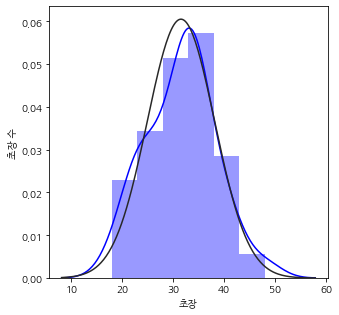

c:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


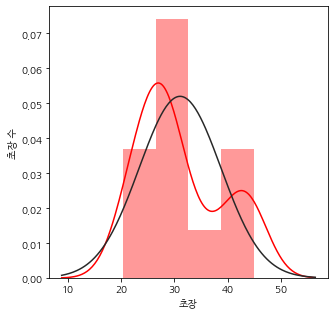

In [25]:
two_stats(smart['초장'], normal['초장'])

plt.rc("font", family = "NanumGothic")
plt.rcParams['figure.figsize'] = (5, 5)

sns.distplot(smart['초장'], fit=stats.norm, color='blue')
plt.ylabel("초장 수")
plt.show()

sns.distplot(normal['초장'], fit=stats.norm, color='red')
plt.ylabel("초장 수")
plt.show()

정규성 검정 결과 =  ShapiroResult(statistic=0.9312727451324463, pvalue=0.030525853857398033)
검정 통계량 = 0.931, p-value = 0.031
<해석>
p-value =  0.031  <= 0.05 이므로, 정규성을 불만족한다
 
정규성 검정 결과 =  ShapiroResult(statistic=0.9560394287109375, pvalue=0.17352114617824554)
검정 통계량 = 0.956, p-value = 0.174
<해석>
p-value =  0.174  > 0.05 이므로, 정규성을 만족한다
 
두 집단 평균 검정 (단일 표본검정) =  Ttest_indResult(statistic=-1.3690181907927796, pvalue=0.175498811985896)
t-검정 통계량 = -1.369, p-value = 0.175
<해석>
1. p-value =  0.175  > 0.05 이므로, 귀무가설 채택
2. 귀무가설 채택 : 두개의 집단과 관측값의 평균은 서로 같다.
 
등분산성 levene 검증결과  = LeveneResult(statistic=10.63475064613447, pvalue=0.0017363115004524227)
검정 통계량 = 10.635, p-value = 0.002
<해석>
p-value = 0.002  <= 0.05 이므로, 등분산성을 만족 하지 않는다
 
등분산성 levene 검증결과  = FlignerResult(statistic=7.158786836636456, pvalue=0.0074597633704014035)
검정 통계량 = 7.159, p-value = 0.007
<해석>
p-value = 0.007  <= 0.05 이므로, 등분산성을 만족 하지 않는다
 
등분산성 levene 검증결과  = BartlettResult(statistic=16.53860188789079, pvalue=4.766965954611904e-05)
검정

c:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


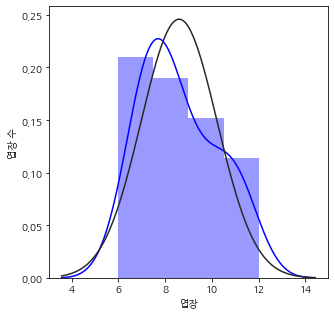

c:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


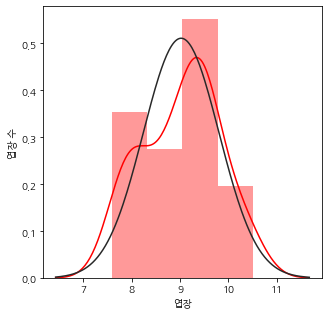

In [26]:
two_stats(smart['엽장'], normal['엽장'])

plt.rc("font", family = "NanumGothic")
plt.rcParams['figure.figsize'] = (5, 5)

sns.distplot(smart['엽장'], fit=stats.norm, color='blue')
plt.ylabel("엽장 수")
plt.show()

sns.distplot(normal['엽장'], fit=stats.norm, color='red')
plt.ylabel("엽장 수")
plt.show()

정규성 검정 결과 =  ShapiroResult(statistic=0.9090462923049927, pvalue=0.006985033862292767)
검정 통계량 = 0.909, p-value = 0.007
<해석>
p-value =  0.007  <= 0.05 이므로, 정규성을 불만족한다
 
정규성 검정 결과 =  ShapiroResult(statistic=0.9432687759399414, pvalue=0.07041522115468979)
검정 통계량 = 0.943, p-value = 0.070
<해석>
p-value =  0.07  > 0.05 이므로, 정규성을 만족한다
 
두 집단 평균 검정 (단일 표본검정) =  Ttest_indResult(statistic=-3.3104519632934717, pvalue=0.0014930242738468377)
t-검정 통계량 = -3.310, p-value = 0.001
<해석>
1. p-value =  0.001  <= 0.05 이므로, 귀무가설 기각
2. 대립가설 채택 : 두개의 집단과 관측값의 평균은 서로 같지 않다.
 
등분산성 levene 검증결과  = LeveneResult(statistic=6.832399196112166, pvalue=0.011012945522707691)
검정 통계량 = 6.832, p-value = 0.011
<해석>
p-value = 0.011  <= 0.05 이므로, 등분산성을 만족 하지 않는다
 
등분산성 levene 검증결과  = FlignerResult(statistic=6.620909966540584, pvalue=0.010078832538415862)
검정 통계량 = 6.621, p-value = 0.010
<해석>
p-value = 0.01  <= 0.05 이므로, 등분산성을 만족 하지 않는다
 
등분산성 levene 검증결과  = BartlettResult(statistic=16.058063728344738, pvalue=6.142946755732029e-05

c:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


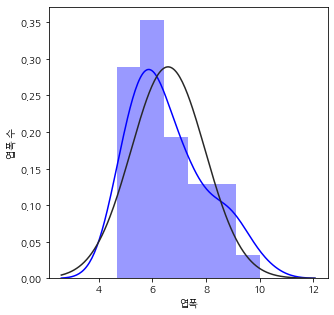

c:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


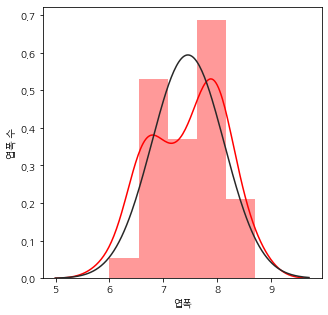

In [27]:
two_stats(smart['엽폭'], normal['엽폭'])

plt.rc("font", family = "NanumGothic")
plt.rcParams['figure.figsize'] = (5, 5)

sns.distplot(smart['엽폭'], fit=stats.norm, color='blue')
plt.ylabel("엽폭 수")
plt.show()

sns.distplot(normal['엽폭'], fit=stats.norm, color='red')
plt.ylabel("엽폭 수")
plt.show()

정규성 검정 결과 =  ShapiroResult(statistic=0.9293323159217834, pvalue=0.02672666311264038)
검정 통계량 = 0.929, p-value = 0.027
<해석>
p-value =  0.027  <= 0.05 이므로, 정규성을 불만족한다
 
정규성 검정 결과 =  ShapiroResult(statistic=0.890539288520813, pvalue=0.0022229638416320086)
검정 통계량 = 0.891, p-value = 0.002
<해석>
p-value =  0.002  <= 0.05 이므로, 정규성을 불만족한다
 
두 집단 평균 검정 (단일 표본검정) =  Ttest_indResult(statistic=1.5260360090176075, pvalue=0.13163893907991847)
t-검정 통계량 = 1.526, p-value = 0.132
<해석>
1. p-value =  0.132  > 0.05 이므로, 귀무가설 채택
2. 귀무가설 채택 : 두개의 집단과 관측값의 평균은 서로 같다.
 
등분산성 levene 검증결과  = LeveneResult(statistic=0.7003971537612792, pvalue=0.4055818568247821)
검정 통계량 = 0.700, p-value = 0.406
<해석>
p-value = 0.406  > 0.05 이므로, 등분산성을 만족한다
 
등분산성 levene 검증결과  = FlignerResult(statistic=0.7456262381881279, pvalue=0.38786453255272624)
검정 통계량 = 0.746, p-value = 0.388
<해석>
p-value = 0.388  > 0.05 이므로, 등분산성을 만족한다
 
등분산성 levene 검증결과  = BartlettResult(statistic=0.9184371783959544, pvalue=0.33788565303531193)
검정 통계량 = 0.918, p

c:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


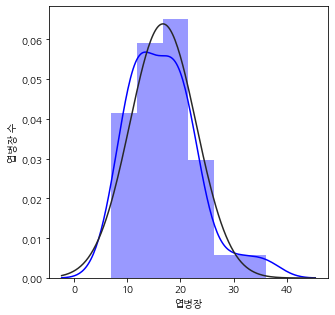

c:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


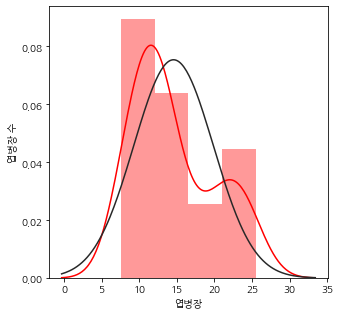

In [28]:
two_stats(smart['엽병장'], normal['엽병장'])

plt.rc("font", family = "NanumGothic")
plt.rcParams['figure.figsize'] = (5, 5)

sns.distplot(smart['엽병장'], fit=stats.norm, color='blue')
plt.ylabel("엽병장 수")
plt.show()

sns.distplot(normal['엽병장'], fit=stats.norm, color='red')
plt.ylabel("엽병장 수")
plt.show()

정규성 검정 결과 =  ShapiroResult(statistic=0.9086300730705261, pvalue=0.006801806390285492)
검정 통계량 = 0.909, p-value = 0.007
<해석>
p-value =  0.007  <= 0.05 이므로, 정규성을 불만족한다
 
정규성 검정 결과 =  ShapiroResult(statistic=0.9292912483215332, pvalue=0.026651762425899506)
검정 통계량 = 0.929, p-value = 0.027
<해석>
p-value =  0.027  <= 0.05 이므로, 정규성을 불만족한다
 
두 집단 평균 검정 (단일 표본검정) =  Ttest_indResult(statistic=2.057382379812432, pvalue=0.04348684934886469)
t-검정 통계량 = 2.057, p-value = 0.043
<해석>
1. p-value =  0.043  <= 0.05 이므로, 귀무가설 기각
2. 대립가설 채택 : 두개의 집단과 관측값의 평균은 서로 같지 않다.
 
등분산성 levene 검증결과  = LeveneResult(statistic=2.1502343604863, pvalue=0.1471575650540544)
검정 통계량 = 2.150, p-value = 0.147
<해석>
p-value = 0.147  > 0.05 이므로, 등분산성을 만족한다
 
등분산성 levene 검증결과  = FlignerResult(statistic=1.9750479560404104, pvalue=0.15991306779266581)
검정 통계량 = 1.975, p-value = 0.160
<해석>
p-value = 0.16  > 0.05 이므로, 등분산성을 만족한다
 
등분산성 levene 검증결과  = BartlettResult(statistic=1.5802621486694794, pvalue=0.20872293713989823)
검정 통계량 = 1.580, p

c:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


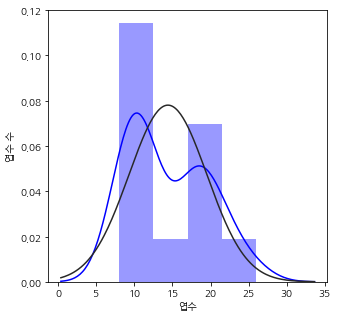

c:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


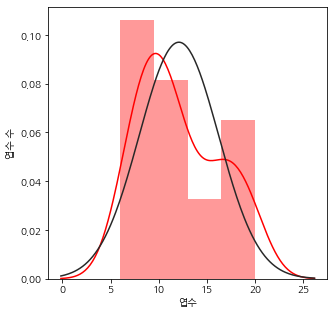

In [29]:
two_stats(smart['엽수'], normal['엽수'])

plt.rc("font", family = "NanumGothic")
plt.rcParams['figure.figsize'] = (5, 5)

sns.distplot(smart['엽수'], fit=stats.norm, color='blue')
plt.ylabel("엽수 수")
plt.show()

sns.distplot(normal['엽수'], fit=stats.norm, color='red')
plt.ylabel("엽수 수")
plt.show()

정규성 검정 결과 =  ShapiroResult(statistic=0.9131988286972046, pvalue=0.00912553258240223)
검정 통계량 = 0.913, p-value = 0.009
<해석>
p-value =  0.009  <= 0.05 이므로, 정규성을 불만족한다
 
정규성 검정 결과 =  ShapiroResult(statistic=0.8589334487915039, pvalue=0.00037019242881797254)
검정 통계량 = 0.859, p-value = 0.000
<해석>
p-value =  0.0  <= 0.05 이므로, 정규성을 불만족한다
 
두 집단 평균 검정 (단일 표본검정) =  Ttest_indResult(statistic=4.682296497874308, pvalue=1.4015258523882078e-05)
t-검정 통계량 = 4.682, p-value = 0.000
<해석>
1. p-value =  0.0  <= 0.05 이므로, 귀무가설 기각
2. 대립가설 채택 : 두개의 집단과 관측값의 평균은 서로 같지 않다.
 
등분산성 levene 검증결과  = LeveneResult(statistic=8.78643945424829, pvalue=0.004181049525427556)
검정 통계량 = 8.786, p-value = 0.004
<해석>
p-value = 0.004  <= 0.05 이므로, 등분산성을 만족 하지 않는다
 
등분산성 levene 검증결과  = FlignerResult(statistic=8.353599312357726, pvalue=0.003849240756686049)
검정 통계량 = 8.354, p-value = 0.004
<해석>
p-value = 0.004  <= 0.05 이므로, 등분산성을 만족 하지 않는다
 
등분산성 levene 검증결과  = BartlettResult(statistic=17.0160478937002, pvalue=3.706521963518679e-05)
검

c:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


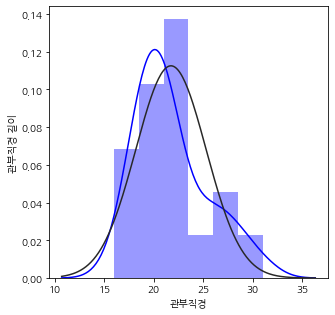

c:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


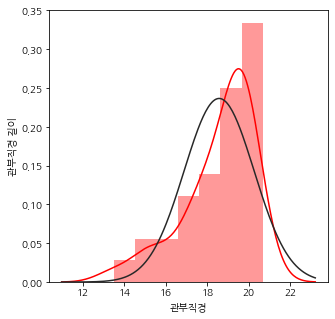

In [30]:
two_stats(smart['관부직경'], normal['관부직경'])

plt.rc("font", family = "NanumGothic")
plt.rcParams['figure.figsize'] = (5, 5)

sns.distplot(smart['관부직경'], fit=stats.norm, color='blue')
plt.ylabel("관부직경 길이")
plt.show()

sns.distplot(normal['관부직경'], fit=stats.norm, color='red')
plt.ylabel("관부직경 길이")
plt.show()

정규성 검정 결과 =  ShapiroResult(statistic=0.6674943566322327, pvalue=1.20867213126985e-07)
검정 통계량 = 0.667, p-value = 0.000
<해석>
p-value =  0.0  <= 0.05 이므로, 정규성을 불만족한다
 
정규성 검정 결과 =  ShapiroResult(statistic=0.8888619542121887, pvalue=0.002011187607422471)
검정 통계량 = 0.889, p-value = 0.002
<해석>
p-value =  0.002  <= 0.05 이므로, 정규성을 불만족한다
 
두 집단 평균 검정 (단일 표본검정) =  Ttest_indResult(statistic=0.451536868370227, pvalue=0.6530395236460645)
t-검정 통계량 = 0.452, p-value = 0.653
<해석>
1. p-value =  0.653  > 0.05 이므로, 귀무가설 채택
2. 귀무가설 채택 : 두개의 집단과 관측값의 평균은 서로 같다.
 
등분산성 levene 검증결과  = LeveneResult(statistic=0.8803271014705705, pvalue=0.35143282852871993)
검정 통계량 = 0.880, p-value = 0.351
<해석>
p-value = 0.351  > 0.05 이므로, 등분산성을 만족한다
 
등분산성 levene 검증결과  = FlignerResult(statistic=0.008073324127881013, pvalue=0.9284050807352736)
검정 통계량 = 0.008, p-value = 0.928
<해석>
p-value = 0.928  > 0.05 이므로, 등분산성을 만족한다
 
등분산성 levene 검증결과  = BartlettResult(statistic=11.823834303484333, pvalue=0.0005847731317067595)
검정 통계량 = 11.824,

c:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


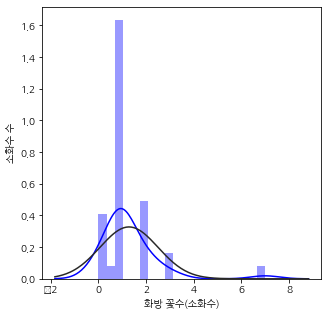

c:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


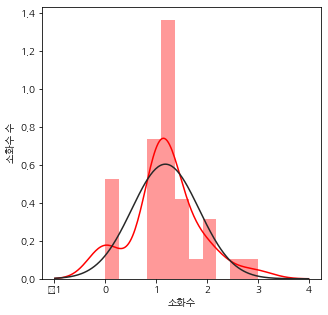

In [31]:
two_stats(smart['화방 꽃수(소화수)'], normal['소화수'])

plt.rc("font", family = "NanumGothic")
plt.rcParams['figure.figsize'] = (5, 5)

sns.distplot(smart['화방 꽃수(소화수)'], fit=stats.norm, color='blue')
plt.ylabel("소화수 수")
plt.show()

sns.distplot(normal['소화수'], fit=stats.norm, color='red')
plt.ylabel("소화수 수")
plt.show()

정규성 검정 결과 =  ShapiroResult(statistic=0.944941520690918, pvalue=0.07923577725887299)
검정 통계량 = 0.945, p-value = 0.079
<해석>
p-value =  0.079  > 0.05 이므로, 정규성을 만족한다
 
정규성 검정 결과 =  ShapiroResult(statistic=0.9020540714263916, pvalue=0.004492308013141155)
검정 통계량 = 0.902, p-value = 0.004
<해석>
p-value =  0.004  <= 0.05 이므로, 정규성을 불만족한다
 
두 집단 평균 검정 (단일 표본검정) =  Ttest_indResult(statistic=5.859643205656878, pvalue=1.49317324128422e-07)
t-검정 통계량 = 5.860, p-value = 0.000
<해석>
1. p-value =  0.0  <= 0.05 이므로, 귀무가설 기각
2. 대립가설 채택 : 두개의 집단과 관측값의 평균은 서로 같지 않다.
 
등분산성 levene 검증결과  = LeveneResult(statistic=1.8467465740464508, pvalue=0.17865270781758594)
검정 통계량 = 1.847, p-value = 0.179
<해석>
p-value = 0.179  > 0.05 이므로, 등분산성을 만족한다
 
등분산성 levene 검증결과  = FlignerResult(statistic=1.0239786691611272, pvalue=0.3115771131204797)
검정 통계량 = 1.024, p-value = 0.312
<해석>
p-value = 0.312  > 0.05 이므로, 등분산성을 만족한다
 
등분산성 levene 검증결과  = BartlettResult(statistic=3.4761049264607604, pvalue=0.06226112867174678)
검정 통계량 = 3.476, p-

c:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


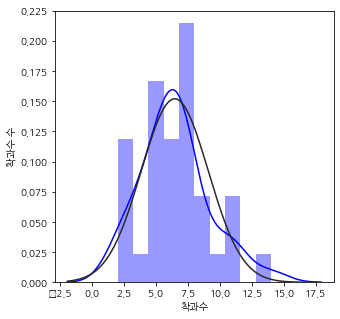

c:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


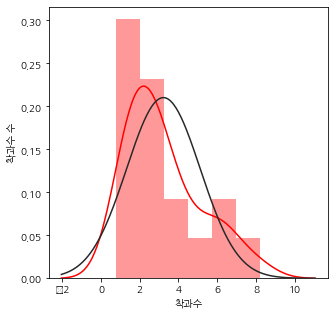

In [32]:
two_stats(smart['착과수'], normal['착과수'])

plt.rc("font", family = "NanumGothic")
plt.rcParams['figure.figsize'] = (5, 5)

sns.distplot(smart['착과수'], fit=stats.norm, color='blue')
plt.ylabel("착과수 수")
plt.show()

sns.distplot(normal['착과수'], fit=stats.norm, color='red')
plt.ylabel("착과수 수")
plt.show()

##### 상관분석 (피어슨)

In [33]:
smart.corr(method='pearson')

,초장,엽장,엽폭,엽병장,엽수,관부직경,화방 꽃수(소화수),착과수,최종화방차수
초장,1.000000,0.134119,0.354569,0.481576,-0.172710,0.350708,-0.272757,-0.168296,-0.028527
엽장,0.134119,1.000000,0.833119,0.686858,0.199034,-0.056383,-0.071902,0.053546,-0.028965
엽폭,0.354569,0.833119,1.000000,0.813657,0.116971,-0.036502,0.084314,0.064113,-0.007756
엽병장,0.481576,0.686858,0.813657,1.000000,0.236999,-0.095338,-0.059279,0.148418,0.177738
엽수,-0.172710,0.199034,0.116971,0.236999,1.000000,0.105270,0.368564,0.278742,0.745721
관부직경,0.350708,-0.056383,-0.036502,-0.095338,0.105270,1.000000,-0.179692,-0.087134,-0.102954
화방 꽃수(소화수),-0.272757,-0.071902,0.084314,-0.059279,0.368564,-0.179692,1.000000,0.054980,0.370535
착과수,-0.168296,0.053546,0.064113,0.148418,0.278742,-0.087134,0.054980,1.000000,0.202297
최종화방차수,-0.028527,-0.028965,-0.007756,0.177738,0.745721,-0.102954,0.370535,0.202297,1.000000


In [34]:
stats.spearmanr(smart, smart['착과수'])

SpearmanrResult(correlation=array([[ 1.        , -0.02941391,  0.1552835 ,  0.28982174, -0.21663054,
         0.39054645, -0.14460535, -0.17583389, -0.00354654, -0.17583389],
       [-0.02941391,  1.        ,  0.84369977,  0.71603394,  0.25575923,
        -0.09467858,  0.0052975 ,  0.15610818, -0.04293207,  0.15610818],
       [ 0.1552835 ,  0.84369977,  1.        ,  0.76116749,  0.169406  ,
        -0.0375563 ,  0.21056945,  0.21749465, -0.02707598,  0.21749465],
       [ 0.28982174,  0.71603394,  0.76116749,  1.        ,  0.24199338,
        -0.05606273,  0.02328621,  0.28055662,  0.09155852,  0.28055662],
       [-0.21663054,  0.25575923,  0.169406  ,  0.24199338,  1.        ,
         0.12420592,  0.34574969,  0.26399728,  0.70173354,  0.26399728],
       [ 0.39054645, -0.09467858, -0.0375563 , -0.05606273,  0.12420592,
         1.        , -0.07234132, -0.06573903, -0.04936565, -0.06573903],
       [-0.14460535,  0.0052975 ,  0.21056945,  0.02328621,  0.34574969,
        -0.072341

c:\Users\admin\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<AxesSubplot:>

c:\Users\admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


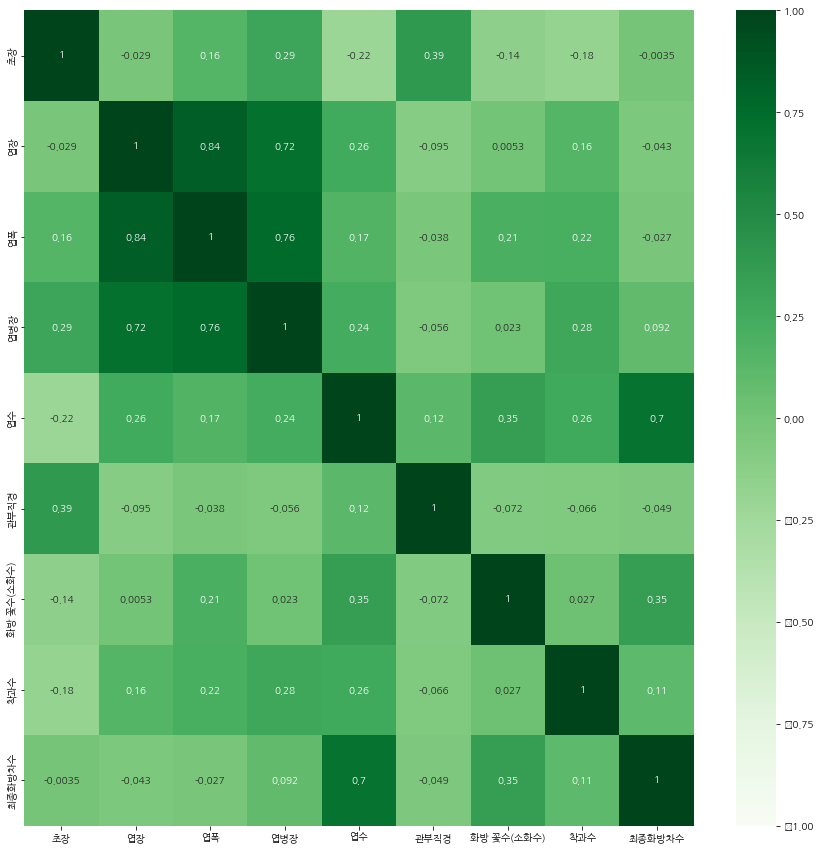

In [35]:
plt.rcParams["figure.figsize"] = (15,15)
# 한글처리
plt.rc("font", family  ="NanumGothic")
sns.heatmap(smart.corr(method='spearman'),
           annot = True, #실제 값 화면에 나타내기
           cmap = 'Greens', #색상
           vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1
          )

In [36]:
normal.corr(method='pearson')

,초장,엽장,엽폭,엽병장,엽수,관부직경,소화수,착과수
초장,1.000000,0.295937,-0.064881,0.988827,0.935322,0.304515,-0.192066,-0.536160
엽장,0.295937,1.000000,0.860908,0.278654,0.064962,-0.386672,0.346189,0.377375
엽폭,-0.064881,0.860908,1.000000,-0.049979,-0.287026,-0.574733,0.363135,0.628817
엽병장,0.988827,0.278654,-0.049979,1.000000,0.927116,0.300050,-0.239227,-0.522495
엽수,0.935322,0.064962,-0.287026,0.927116,1.000000,0.378823,-0.345457,-0.608023
관부직경,0.304515,-0.386672,-0.574733,0.300050,0.378823,1.000000,-0.272190,-0.195634
소화수,-0.192066,0.346189,0.363135,-0.239227,-0.345457,-0.272190,1.000000,0.317890
착과수,-0.536160,0.377375,0.628817,-0.522495,-0.608023,-0.195634,0.317890,1.000000


c:\Users\admin\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<AxesSubplot:>

c:\Users\admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


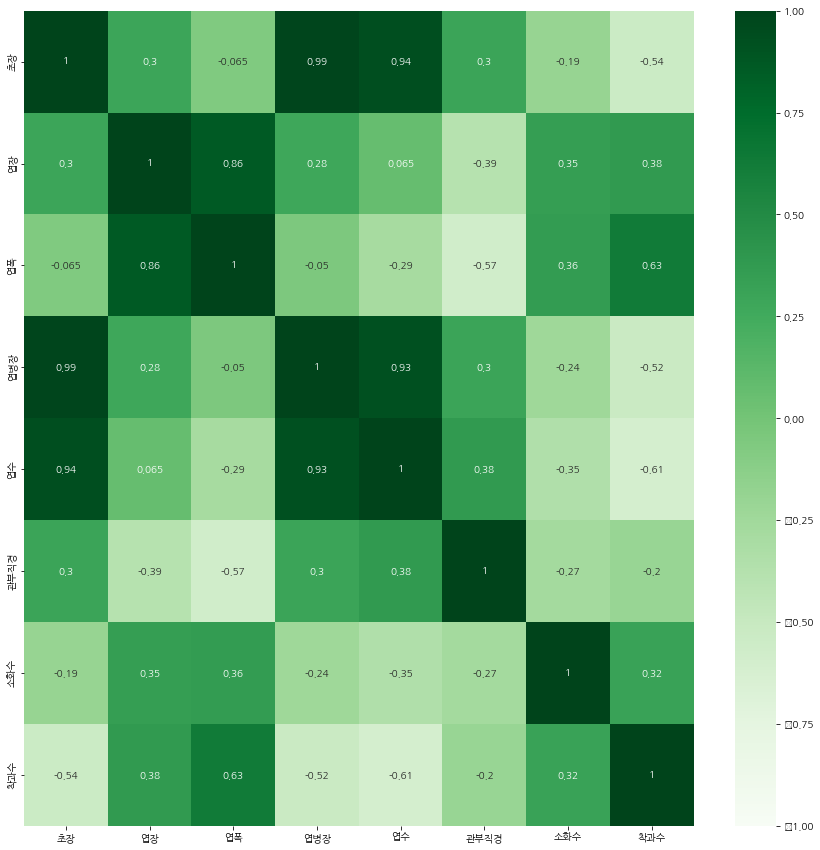

In [37]:
plt.rcParams["figure.figsize"] = (15,15)
# 한글처리
plt.rc("font", family  ="NanumGothic")

sns.heatmap(normal.corr(),
           annot = True, #실제 값 화면에 나타내기
           cmap = 'Greens', #색상
           vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1
          )

### 기존농업 vs 스마트팜 해석

c:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


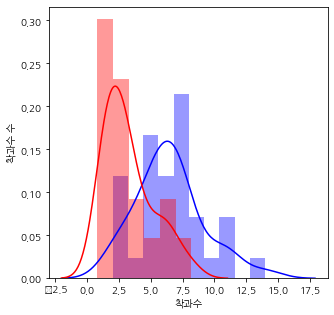

In [38]:
plt.rc("font", family = "NanumGothic")
plt.rcParams['figure.figsize'] = (5, 5)

sns.distplot(smart['착과수'], color='blue')
plt.ylabel("착과수 수")

sns.distplot(normal['착과수'], color='red')
plt.ylabel("착과수 수")
plt.show()

In [39]:
print(round(smart['착과수'].mean()))
print(round(normal['착과수'].mean()))

6
3


In [40]:
print("""해석 : 일반농업 방법으로 수확한 딸기의 평균은 3이고
      스마트팜으로 수확한 딸기의 평균은 6으로 스마트팜이 2배 많이 수확합니다.
      또한 일반농업에서는 12월부터 5월까지만 재배할 기후조건이 갖추어져
      스마트팜은 재배기간도 일반농업의 2배이상이라고 볼 수 있고
      같은 토지면적에서도 일반농업의 재배면적을 2~3배를 넘기 때문에
      단순 산술적으론 8배의 생산량 차이를 보일 수 있을 것입니다.
      
      기존농업에서 착과수에 긍정적인(높을수록 좋은) 주요요인으로 엽병장(줄기에서잎으로전개부분), 엽수(잎의수), 엽폭(잎의너비) 순으로 나왔고
      부정적인(낮을수록 좋은) 주요요인으로는 초장(식물높이), 관부직경(뿌리와 잎 전개부분)이 나왔습니다.
      영양분과 수분을 흡수, 이동하는 부위는 짧을수록 좋고 광합성하기 유리한 넓고 많은 잎은 많을 수록 좋다는 것을 알 수 있습니다.
      또한 긍정적 요인은 잎에서 모두 나왔고 부정적요인은 뿌리와 줄기에서 나왔습니다.
      
      스마트팜에서는 착과수에 긍정적인 주요요인으로 엽폭(잎의너비), 엽장(잎의길이), 소화수(꽃의수) 순서로 나왔고
      부정적인 주요요인으로는 엽수(잎의수), 초장(식물높이), 엽병장(줄기에서잎으로전개부분)이 나왔습니다.
      일반농업의 긍정적 요인이였던 엽병장, 엽수가 스마트팜에서는 부정적요인으로 나왔습니다.
      스마트팜에서는 많은 잎과 긴 엽병장보다 잎 하나하나가 넓고 긴것이 중요했고 꽃의 수가 착과에 관련이 높았고
      기존농업과 스마트팜 둘다 식물의 높이는 부정적인 요인으로 작용하여 종자개량을 할때나 식물 높이를 조절할 수 있다면
      1순위로 고려해야 한다고 생각합니다.
      
      결론적으로 환경 요인분석에서 그랬듯이 스마트팜을 활용한 작물재배가 생산성에서도 유리하다고 말씀드리고 싶습니다.
      아쉬운점은 딸기종자의 분류가 없어서 재배종에 따른 분석을 하지 못했고 환경요인분석과 합해서 환경과 면적당 생산량에 대한
      예측값을 분석해보고 싶었는데 시간이 부족해서 하지 못했습니다.
      """)

해석 : 일반농업 방법으로 수확한 딸기의 평균은 3이고
      스마트팜으로 수확한 딸기의 평균은 6으로 스마트팜이 2배 많이 수확합니다.
      또한 일반농업에서는 12월부터 5월까지만 재배할 기후조건이 갖추어져
      스마트팜은 재배기간도 일반농업의 2배이상이라고 볼 수 있고
      같은 토지면적에서도 일반농업의 재배면적을 2~3배를 넘기 때문에
      단순 산술적으론 8배의 생산량 차이를 보일 수 있을 것입니다.
      
      기존농업에서 착과수에 긍정적인(높을수록 좋은) 주요요인으로 엽병장(줄기에서잎으로전개부분), 엽수(잎의수), 엽폭(잎의너비) 순으로 나왔고
      부정적인(낮을수록 좋은) 주요요인으로는 초장(식물높이), 관부직경(뿌리와 잎 전개부분)이 나왔습니다.
      영양분과 수분을 흡수, 이동하는 부위는 짧을수록 좋고 광합성하기 유리한 넓고 많은 잎은 많을 수록 좋다는 것을 알 수 있습니다.
      또한 긍정적 요인은 잎에서 모두 나왔고 부정적요인은 뿌리와 줄기에서 나왔습니다.
      
      스마트팜에서는 착과수에 긍정적인 주요요인으로 엽폭(잎의너비), 엽장(잎의길이), 소화수(꽃의수) 순서로 나왔고
      부정적인 주요요인으로는 엽수(잎의수), 초장(식물높이), 엽병장(줄기에서잎으로전개부분)이 나왔습니다.
      일반농업의 긍정적 요인이였던 엽병장, 엽수가 스마트팜에서는 부정적요인으로 나왔습니다.
      스마트팜에서는 많은 잎과 긴 엽병장보다 잎 하나하나가 넓고 긴것이 중요했고 꽃의 수가 착과에 관련이 높았고
      기존농업과 스마트팜 둘다 식물의 높이는 부정적인 요인으로 작용하여 종자개량을 할때나 식물 높이를 조절할 수 있다면
      1순위로 고려해야 한다고 생각합니다.
      
      결론적으로 환경 요인분석에서 그랬듯이 스마트팜을 활용한 작물재배가 생산성에서도 유리하다고 말씀드리고 싶습니다.
      아쉬운점은 딸기종자의 분류가 없어서 재배종에 따른 분석을 하지 못했